In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\CAPSTONE 2\diabetes.csv")

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check Null Values

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check Duplicate Values

In [17]:
data.duplicated().sum()

0

<Axes: >

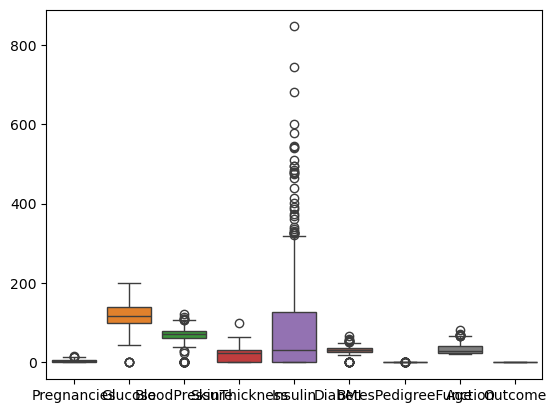

In [19]:
sns.boxplot(data=data)

In [21]:
for i in data:                  # i = column name 
    if data[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = data[i].quantile(0.25)  # for 1 column compute q1
        q3 = data[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        data[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

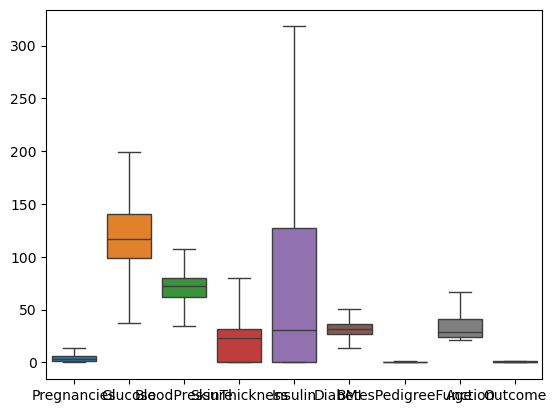

In [23]:
sns.boxplot(data=data)

In [25]:
from sklearn.model_selection import train_test_split

x = data.drop(['Outcome'],axis=1)
y = data[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=231)

In [27]:
from sklearn.ensemble import RandomForestRegressor  # y = Number
from sklearn.ensemble import RandomForestClassifier # y = Category

# by default 100 tree will be form 
RFModel = RandomForestClassifier(random_state=20,
                               n_estimators=25, # make 25 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

RFModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25, random_state=20)

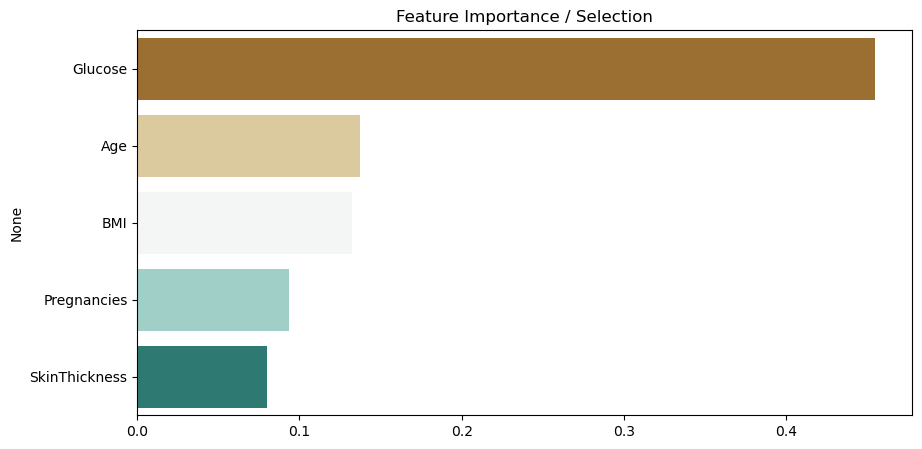

In [31]:
imp = pd.Series(data=RFModel.feature_importances_, index=RFModel.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature Importance / Selection")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="BrBG")

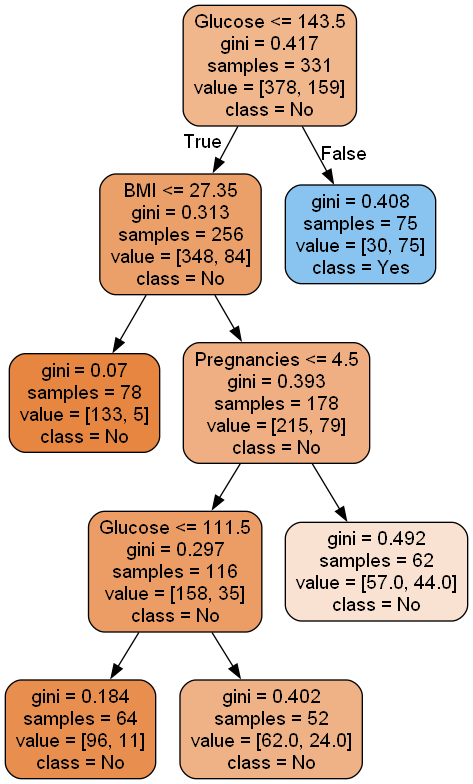

In [35]:
from sklearn.tree import export_graphviz
import pydot

feature_list = list(x.columns)  # all independent variable name
tree = RFModel.estimators_[0]  # 0-24 specify the tree number   

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                class_names = ['No','Yes'] ,
                rounded = True, 
                filled=True)
(graph, ) = pydot.graph_from_dot_file('abc.dot')
graph.write_png('tree.png')


from IPython.display import Image
Image(filename = 'tree.png')

In [37]:
train = pd.concat([y_train,X_train],axis=1)
train.head(2)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
151,0,4.0,114.0,65,0,0.0,21.9,0.432,37.0
402,1,5.0,136.0,84,41,88.0,35.0,0.286,35.0


In [41]:
train['Predicted'] = RFModel.predict(X_train)
train.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted
151,0,4.0,114.0,65,0,0.0,21.9,0.432,37.0,0
402,1,5.0,136.0,84,41,88.0,35.0,0.286,35.0,0
152,1,9.0,156.0,86,28,155.0,34.3,1.189,42.0,1
431,0,3.0,89.0,74,16,85.0,30.4,0.551,38.0,0
724,0,1.0,111.0,94,0,0.0,32.8,0.265,45.0,0


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Outcome'],train['Predicted'])
print(confusion_matrix)

[[331  22]
 [ 95  89]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       353
           1       0.80      0.48      0.60       184

    accuracy                           0.78       537
   macro avg       0.79      0.71      0.73       537
weighted avg       0.79      0.78      0.77       537



In [47]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
397,0.0,131.0,66,40,0.0,34.3,0.196,22.0,1
313,3.0,113.0,50,10,85.0,29.5,0.626,25.0,0
759,6.0,190.0,92,0,0.0,35.5,0.278,66.0,1
194,8.0,85.0,55,20,0.0,24.4,0.136,42.0,0
475,0.0,137.0,84,27,0.0,27.3,0.231,59.0,0


In [49]:
test['Predicted'] = RFModel.predict(X_test)
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Predicted
397,0.0,131.0,66,40,0.0,34.3,0.196,22.0,1,0
313,3.0,113.0,50,10,85.0,29.5,0.626,25.0,0,0
759,6.0,190.0,92,0,0.0,35.5,0.278,66.0,1,1
194,8.0,85.0,55,20,0.0,24.4,0.136,42.0,0,0
475,0.0,137.0,84,27,0.0,27.3,0.231,59.0,0,0


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Outcome'],test['Predicted'])
print(confusion_matrix)

[[136  11]
 [ 47  37]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(test['Outcome'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       147
           1       0.77      0.44      0.56        84

    accuracy                           0.75       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.75      0.75      0.73       231

